# Data preprocessing (1/2)

> Any modification performed on the data before feeding them to a ML algorithm.

In order to improve the performance of our model, in many occasions we must improve the quality of the data we train it on. The phrase [garbage in, garbage out](https://en.wikipedia.org/wiki/Garbage_in,_garbage_out) is especially applicable in ML and dictates that we must strive to improve the quality of the training data.

In previous tutorials, we've seen several preprocessing steps, including [data cleaning](https://en.wikipedia.org/wiki/Data_cleansing), handling [missing data](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4) and [encoding](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/) the data, but we haven't formally addressed the topic yet.

Other steps we'll address are feature scaling, selection and extraction, as well as some data re-sampling techniques.

We'll start by partitioning the preprocessing steps into two categories **mandatory** and **optional**.

- Mandatory steps, as their name implies, are preprocessing steps that should **always** be a part of a ML workflow.
- On the contrary, optional steps, might increase performance in some cases while in others they might not. 

In [44]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Mandatory preprocessing steps

There are three preprocessing steps that every ML workflow should always include:

- Handling of **missing values** 
- Data **encoding**
- Feature **scaling**

### Missing data

Encountering missing data is a natural part of data analysis and can occur in multiple cases, due to circumstance or by design. Unfortunately, ML algorithms can't handle missing values, so we'll need to deal with the issue ourselves beforehand (i.e. during data preprocessing).

Let's create a DataFrame with some missing values to better illustrate the problem.

In [45]:
df = pd.DataFrame({'age': [20, 21, 23, 28, 25, None, None, 31, 27, 25],
                   'sex': ['M', 'M', 'F', 'M', 'F', 'M', None, 'F', 'F', None], 
                   'height': [1.73, 1.85, 1.66, 1.77, 1.62, 1.81, None, None, 1.57, 1.89],
                   'education': ['Student', 'Student', 'BSc', 'MSc', None, None, 'BSc', None, 'MSc', None],
                   'weight': [None, None, None, None, None, 75, None, None, None, None]})

df

,age,sex,height,education,weight
0,20.0,M,1.73,Student,NaN
1,21.0,M,1.85,Student,NaN
2,23.0,F,1.66,BSc,NaN
3,28.0,M,1.77,MSc,NaN
4,25.0,F,1.62,None,NaN
5,NaN,M,1.81,None,75.0
6,NaN,None,NaN,BSc,NaN
7,31.0,F,NaN,None,NaN
8,27.0,F,1.57,MSc,NaN
9,25.0,None,1.89,None,NaN


There are two main ways of *handling* missing values: **remove** them or **replace** them with actual values, each of which has multiple ways it can be accomplished.

#### Drop missing values 

To remove a <font color=#ff0066> **single missing value** </font> we have two options:

- Drop its <font color=#8a4266> **row** </font>. Essentially this means throwing away the whole sample.
- Drop its <font color=#9090d5> **column** </font>. Throw away the whole feature.

<table>
  <tr>
    <th></th>
    <th> <b> age </b> </th>
    <th> <b> sex </b> </th>
    <th> <b> height </b> </th>
    <th> <b> education </b> </th>
    <th bgcolor=#9090d5> <b> weight </b> </th>
  </tr>
  <tr>
    <td>0</td>
    <td>20.0</td>
    <td>M</td>
    <td>1.73</td>
    <td>Student</td>
    <td bgcolor=#9090d5>NaN</td>
  </tr>
  <tr>
    <td>1</td>
    <td>21.0</td>
    <td>M</td>
    <td>1.85</td>
    <td>Student</td>
    <td bgcolor=#9090d5>NaN</td>
  </tr>
  <tr>
    <td>2</td>
    <td>23.0</td>
    <td>F</td>
    <td>1.66</td>
    <td>BSc</td>
    <td bgcolor=#9090d5>NaN</td>
  </tr>
  <tr>
    <td>3</td>
    <td>28.0</td>
    <td>M</td>
    <td>1.77</td>
    <td>MSc</td>
    <td bgcolor=#9090d5>NaN</td>
  </tr>
  <tr>
    <td>4</td>
    <td>25.0</td>
    <td>F</td>
    <td>1.62</td>
    <td>None</td>
    <td bgcolor=#9090d5>NaN</td>
  </tr>
  <tr>
    <td>5</td>
    <td>NaN</td>
    <td>M</td>
    <td>1.81</td>
    <td>None</td>
    <td bgcolor=#9090d5>75.0</td>
  </tr>
  <tr>
    <td bgcolor=#8a4266>6</td>
    <td bgcolor=#8a4266>NaN</td>
    <td bgcolor=#8a4266>None</td>
    <td bgcolor=#8a4266>NaN</td>
    <td bgcolor=#8a4266>BSc</td>
    <td bgcolor=#ff0066> <b> NaN </b> </td>
  </tr>
  <tr>
    <td>7</td>
    <td>31.0</td>
    <td>F</td>
    <td>NaN</td>
    <td>None</td>
    <td bgcolor=#9090d5>NaN</td>
  </tr>
  <tr>
    <td>8</td>
    <td>27.0</td>
    <td>F</td>
    <td>1.57</td>
    <td>MSc</td>
    <td bgcolor=#9090d5>NaN</td>
  </tr>
  <tr>
    <td>9</td>
    <td>25.0</td>
    <td>None</td>
    <td>1.89</td>
    <td>None</td>
    <td bgcolor=#9090d5>NaN</td>
  </tr>
</table>

These are the two simplest ways of dealing with the issue, however we need to be careful. By dropping a row, we are essentially throwing away a lot of information. If we drop too many rows, we'll **reduce the size** of the dataset significantly, which usually leads to worse performance from the ML algorithms. On the other hand, if we drop a whole column we are disregarding the feature in its entirety along with all the information it might carry.

Generally speaking we should drop a row if many of its values are missing. For instance in the example above <font color=#8a4266> **row number 6** </font> could be dropped without much loss of information, as $4/5$ of its values are missing. Likewise, <font color=#9090d5> **column 'weight'** </font> could be dropped because a large percentage of its values are missing. 

Both of these operations can be easily done with *pandas*.

In [46]:
df = df.drop(6)  # drop row with index '6'
df = df.drop('weight', axis=1)  # drop column 'weight'
df

,age,sex,height,education
0,20.0,M,1.73,Student
1,21.0,M,1.85,Student
2,23.0,F,1.66,BSc
3,28.0,M,1.77,MSc
4,25.0,F,1.62,None
5,NaN,M,1.81,None
7,31.0,F,NaN,None
8,27.0,F,1.57,MSc
9,25.0,None,1.89,None


#### Imputation

Another way to handle a missing value is to substitute it with an actual value. This has the benefit of not throwing the feature or sample away completely and in most cases outperforms the alternative. The catch is that we have to devise a **strategy** on how to impute the values. Ideally, we'd like the value we set to be *realistic*. If not, we'll just add noise to the dataset. When strategizing on how to impute data, one must consider each feature separately (e.g. how can we impute 'age'? how can we impute 'sex'?).

Before considering which value to add, we must take a look on the **mechanisms** that cause the *missingness*. 

There are three such mechanisms:

- **Missing Completely At Random (MCAR)**:  
Values that are missing due to no observable pattern, belong in this category. For example, someone forgot to write down a measurement, an entry was corrupted, a sensor malfunctioned, etc.

- **Missing At Random (MAR)**:  
Regardless of what the name implies, these values **aren't** exactly missing at random. Instead the reason they are missing is **dependent on another feature present in the dataset**. An example of MAR in the above data would be if women were more likely to not enter their age.

- **Missing Not At Random (MNAR)**:  
This category consists of values that are missing **because of their actual value**. For example, a sensor failed to take a measurement because its value was too high (outside manufacturer's limits), someone didn't fill his occupation in a survey because he's unemployed, etc.

The most intuitive way to impute a feature is through **single imputation**, in which each missing value is replaced with a single value.

Let's start with the first feature, i.e. *age*.  
The first thing to do is to check if this feature represents a continuous or a discrete variable; in this case it's a continuous variable.  
Afterwards, we'll need to check which of the three mechanisms mentioned previously, caused the *missingness*. Since we don't have a way to know which one of the three it is, we're left to make an educated guess. We'll **assume** that the values are MCAR (note that all we can do is assume on the nature of the *missingness*; we can never be sure).  
For the actual imputation strategy, we'll try to select a value that affects the distribution of the variable as little as possible. Some strategies we could apply would be filling NaN values with the *mean*, *median* or *mode* of the variable.

In [47]:
# Fill 'age' with its median
df['age'] = df['age'].fillna(df['age'].median())
df

,age,sex,height,education
0,20.0,M,1.73,Student
1,21.0,M,1.85,Student
2,23.0,F,1.66,BSc
3,28.0,M,1.77,MSc
4,25.0,F,1.62,None
5,25.0,M,1.81,None
7,31.0,F,NaN,None
8,27.0,F,1.57,MSc
9,25.0,None,1.89,None


The next feature we'll impute is *height*. We're dealing with a continuous variable and, again, we'll assume a MCAR mechanism. One thing we could do would be to fill it with its median, like before.

In [48]:
df['height'].median()

1.75

We could, however, take it one step further. Couldn't we take into account the person's *sex*?

In [49]:
df.groupby('sex')['height'].median()  # median height of males and females 

sex
F    1.62
M    1.79
Name: height, dtype: float64

So, the median height for a woman is smaller than for a man. By including this information, we can make a more accurate estimate. This essentially discards our MCAR assumption (because the person's *height* depends on his *sex*). This approach **assumes a MAR mechanism**. 

In [50]:
# We could try to use groupby to impute the values but we'll 
# encounter a problem due to the missing value in the 'sex' column.
new_heights = df.groupby('sex')['height'].apply(lambda x: x.fillna(x.median()))
# The problem is that 'new_heights' has a missing value in index 
# number 9, which wasn't there in the original dataset.

# To solve this we'll have to perform a join on the original and imputed heights
merged = pd.merge(df[['height']].dropna(), pd.DataFrame({'height': new_heights}).dropna(), how='left')

# And finally replace the old heights with the new ones
df['height'] = merged.values



In [51]:
df.groupby('sex')['height'].median()

sex
F    1.64
M    1.75
Name: height, dtype: float64

Next up, *sex*. This is a binary variable (i.e. can take only two values). Since we assumed a relationship between this feature and *height*, we'll continue this approach. Specifically, we'll try the reverse and fill the person's *sex* based on his height. The simplest thing we can come up with is to take the median height for men and women and average those two numbers. This will give us a hard threshold we can use to classify each individual's *sex*.

In [52]:
thres = (df.groupby('sex')['height'].median()['M'] + df.groupby('sex')['height'].median()['F']) / 2
thres

1.695

Now any person is missing his *sex* and whose *height* is above that threshold should be classified as a male. One way to accomplish this is to write a function that will be applied on each row of the DataFrame individually. If that row's *sex* is missing, then it should fill it up by looking at the *height*. 

In [62]:
def fill_sex(row):

    if not row['sex']:  # if numeric values best use np.isnan() for the check
        
        if row['height'] > 1.65:
            row['sex'] = 'M'
        else:
            row['sex'] = 'F'
    return row

df = df.apply(fill_sex, axis=1)  # note the axis=1 parameter which indicates that the function should 
                                 # be applied to the DataFrame's rows and not its columns (as ususal)

df

,age,sex,height,education
0,20.0,M,1.73,Student
1,21.0,M,1.85,Student
2,23.0,F,1.66,BSc
3,28.0,M,1.77,MSc
4,25.0,F,1.62,Other
5,25.0,M,1.62,Other
7,31.0,F,1.81,Other
8,27.0,F,1.57,MSc
9,25.0,M,1.89,Other


Finally, we have to deal with the *education*, which is a categorical variable. This one is a bit trickier than the previous. First of all, it has a lot of missing values; we could consider dropping this altogether. However, needlessly throwing away information usually isn't the best approach.

Next, we could consider adopting a simple imputation strategy (e.g. fill with the most frequent value - MCAR assumption). This approach, however, is also problematic. The main issue with this approach is that it will heavily **alter the variable's distribution**. For example, currently we have the same number of students and MSc. If we filled all the missing values with students we would have 7:2 ratio between these two variables.

Another approach would be to assume an association between *education* and another feature (i.e. MAR); the most apparent is between this and *age*. One way to take advantage of this would be to **train a classifier** (e.g. logistic regression) to predict the person's *education* based on his *age*. The classifier would be trained on the rows that have both an *age* and an *education* and would be called to predict on the rows that don't have an *education*. We'll see this in more detail, in a bit. We could even take it one step further and train the classifier on the entirety of the dataset (besides *education*).

Now, to change things up, we'll **assume a MNAR mechanism**. This means that we consider the missingness of the values has something to do with the value itself. For example, people with a high school education didn't fill out their *education* because the option 'high school' wasn't on the form. If this assumption stands, it is wrong to fill the *education* with an already existing value (e.g. most frequent, based on another feature). The only thing we can do is to create a new category (e.g. 'Other') and replace all missing values with that.

In [54]:
df['education'] = df['education'].fillna('Other')
df

,age,sex,height,education
0,20.0,M,1.73,Student
1,21.0,M,1.85,Student
2,23.0,F,1.66,BSc
3,28.0,M,1.77,MSc
4,25.0,F,1.62,Other
5,25.0,M,1.62,Other
7,31.0,F,1.81,Other
8,27.0,F,1.57,MSc
9,25.0,M,1.89,Other


To sum up, up till now we've seen two options for dealing with missing values: removing them or imputing them. The first can be either accomplished by dropping the column(s) or the row(s) that contain the missing values. 

The second is a bit trickier. To successfully impute a missing value, we need to first check what type of values it contains (i.e. continuous or discrete) and make an assumption on the nature of its "missingness". 

- If we think that the values are MCAR we should impute with a value that doesn't alter the viable much from a statistical point of view; some options are the mean, the median, the mode, etc. 
- If our assumption was that the values are MNAR, we should create a new category and impute the missing values with that category.
- In most cases, the safest assumption is to consider the values to be MAR. In this case we could either impute the values empirically (like we did with *sex* above) or through regression/classification. 

All the above fall under a category called **single imputation**, because only **one** value is produced for each missing value.

In contrast, in **multiple imputation** a total of **$M$ candidate values** are produced for each missing value. The $M$ values are then **pooled** together to produce the final single value. Multiple imputation techniques work best on MAR variables, where they can reduce the bias and make the estimation more precise. Furthermore, through analysis of the $M$ imputed datasets, we infer on the uncertainty associated with the estimation of the missing data. Obviously. these techniques have the drawback of a larger computation time and larger memory requirements.

One of the best-known techniques is **Multiple Imputation by Chained Equations (MICE)**. This technique operates under the assumption that all missing values are MAR. Briefly, what it does is:

1. First it replaces all missing values in the dataset with a placeholder, e.g. the feature's mean.
2. Then it selects one feature (usually the one that had the least missing values) and reverts the previous step, by removing the placeholders.
3. Afterwards it performs a regression/classification with all the remaining features as the data and the previously selected one as its labels.
4. Finally, it repeats steps 2-3 until all features with missing values are processed.

This whole procedure is repeated for a number of "cycles", usually $5-10$ times to create multiple datasets.

Unfortunately, [scikit-learn's imputation](https://scikit-learn.org/stable/modules/impute.html#impute) sub-module offers only the most basic techniques. If we want something more sophisticated we'll either have to do it ourselves or through a dedicated package (e.g. [fancyimpute](https://github.com/iskandr/fancyimpute), [statsmodels.imputation.mice](https://www.statsmodels.org/dev/imputation.html#module-statsmodels.imputation.mice))

## Feature Encoding

Another mandatory preprocessing step is feature encoding. Discrete variables can either be represented by numbers or by strings. Most ML algorithms require the input data to be numbers, meaning we need to define a strategy for encoding the strings into numbers.

In [55]:
df2 = pd.DataFrame({'size': ['S', 'L', 'M', 'S', 'S', 'XL', 'M', 'XL', 'L', 'M'],
                    'color': ['R', 'G', 'R', 'B', 'B', 'G', 'R', 'G', 'G', 'B']})

df2

,size,color
0,S,R
1,L,G
2,M,R
3,S,B
4,S,B
5,XL,G
6,M,R
7,XL,G
8,L,G
9,M,B


There are two main types of discrete-valued features: **categorical** (or nominal) and **ordinal**. The difference is that categorical features' values cannot be ordered while ordinal ones can. An example of a categorical feature would be the color of a t-shirt; there is no way to order the values e.g. red < green < blue. The t-shirt's size, on the other hand, is an ordinal feature, as S < M < L < XL.

Ordinal features are the easier to encode. All we need to do is to **map** each value to an integer, while **respecting the order** of the values. For example

Original | New
:-: | :-:
S  | 1
M  | 2
L  | 3
XL | 4

This method is called **label encoding** and can be easily accomplished through *pandas*.

In [12]:
mappings = {'S': 1, 'M': 2, 'L': 3, 'XL':4}

# The easiest way to do this is through pd.Series built-in map function
df2['size'] = df2['size'].map(mappings)

# Or through the good old 'apply'.
# df2['size'] = df2['size'].apply(lambda x: mappings[x])

Pandas can automatically encode values like this

```python
df2['size'] = df2['size'].astype('category')
```

Scikit-learn also has a transformer for encoding ordinal features.

```python
from sklearn.preprocessing import LabelEncoder

data = df2['size'].values  # or a full dataframe with multiple columns

encoder = LabelEncoder()
encoded_data = encoder.fit_transform(data) 
```

Both of these methods have a huge **drawback**: the mapping scheme is selected **automatically**, we don't have any control over the order. This prohibits us from providing the feature's order, which is a way of offering our "domain knowledge" to the model. 

If we label encode a feature that isn't ordered by nature (i.e. categorical), we might *confuse* the model. It is better to **One-Hot Encode** categorical features. This method creates a new feature for each unique value in our feature. For each sample all of the new features are set to $0$ besides the one that corresponds to its value, which set to $1$.

<table>
  <tr>
    <th>color</th>
    <th bgcolor='#f36765'>R</th>
    <th bgcolor='#208075'>G</th>
    <th bgcolor='#b2d0e4'>B</th>
  </tr>
  <tr>
    <td bgcolor='#f36765'>R</td>
    <td bgcolor='#f36765'>1</td>
    <td>0</td>
    <td>0</td>
  </tr>
  <tr>
    <td bgcolor='#208075'>G</td>
    <td>0</td>
    <td bgcolor='#208075'>1</td>
    <td>0</td>
  </tr>
  <tr>
    <td bgcolor='#f36765'>R</td>
    <td bgcolor='#f36765'>1</td>
    <td>0</td>
    <td>0</td>
  </tr>
  <tr>
    <td bgcolor='#b2d0e4'>B</td>
    <td>0</td>
    <td>0</td>
    <td bgcolor='#b2d0e4'>1</td>
  </tr>
  <tr>
    <td bgcolor='#b2d0e4'>B</td>
    <td>0</td>
    <td>0</td>
    <td bgcolor='#b2d0e4'>1</td>
  </tr>
  <tr>
    <td bgcolor='#208075'>G</td>
    <td>0</td>
    <td bgcolor='#208075'>1</td>
    <td>0</td>
  </tr>
  <tr>
    <td bgcolor='#f36765'>R</td>
    <td bgcolor='#f36765'>1</td>
    <td>0</td>
    <td>0</td>
  </tr>
  <tr>
    <td bgcolor='#208075'>G</td>
    <td>0</td>
    <td bgcolor='#208075'>1</td>
    <td>0</td>
  </tr>
  <tr>
    <td bgcolor='#208075'>G</td>
    <td>0</td>
    <td bgcolor='#208075'>1</td>
    <td>0</td>
  </tr>
  <tr>
    <td bgcolor='#b2d0e4'>B</td>
    <td>0</td>
    <td>0</td>
    <td bgcolor='#b2d0e4'>1</td>
  </tr>
</table>

These 3 new features can be interpreted as: "is the t-shirt red?", "is the t-shirt blue?", etc.

This is also referred to as **Dummy Encoding**.

In [13]:
pd.get_dummies(df2['color'])  # we can either pass a Series 
pd.get_dummies(df2)           # or the whole DataFrame
# Caution: the above do not replace the DataFrame
# to replace: df2 = pd.get_dummies(df2)

,size,color_B,color_G,color_R
0,1,0,0,1
1,3,0,1,0
2,2,0,0,1
3,1,1,0,0
4,1,1,0,0
5,4,0,1,0
6,2,0,0,1
7,4,0,1,0
8,3,0,1,0
9,2,1,0,0


Alternatively, we can also do the same with scikit-learn, but its not so practical.

```python
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df2)
encoded_features.todense()
```

When we have a large number of unique values in a categorical features, one-hot encoding might prove a bit problematic.

Suppose we have a categorical feature that has 20 values. If we One-Hot Encode the feature we'll add 19 new features to our dataset! If there are multiple such features, this will lead to a large increase of the **dimensionality** of the data. This leads to all problems associated with high-dimensional data. 

Another problem might occur when one of the values in the feature only represents a small number of samples. This will cause its derived feature to be very **sparse**.

One workaround would be either reducing the diversity of the data (e.g. dropping samples that have a belong to a low frequency class, grouping low frequency classes). A second workaround would be to use a more *advanced* encoding technique. Some of these are *binary encoding*, *sum encoding*, *polynomial encoding* and *backward difference*.

## Feature Scaling

Feature scaling is a procedure that maps all features to the same range of values. Imagine an automobile dataset, where the features are cars' attributes:

ID | Engine Capacity (cc) | Power Output (hp) | Fuel Capacity (lt) | Number of Doors | ...
:-: | :-: | :-: | :-: | :-: | :-:
1 | 1300 | 100 | 40 | 5 | ...
2 | 1700 | 140 | 44 | 3 | ...
3 | 2000 | 210 | 54 | 5 | ...
4 | 3500 | 380 | 62 | 3 | ...
... | ... | ... | ... | ... | ...

Each feature takes a different range of values:

- Engine Capacity ranges from $1000$ to $4000$.
- Power Output ranges $70$ to $500$.
- Fuel Capacity ranges $35$ to $70$.
- Number of doors range from $3$ to $5$.

Feature scaling is important for ensuring that ML algorithms pay the same attention to all features. Imagine a k-NN classifier that uses the Euclidean distance. When attempting to train this model in a dataset whose features differ in range, the distance will be governed by the features that have the broadest range. Another reason is that Gradient Descent converges faster on scaled features.

There are two main ways we can scale our features:

- **normalization**:
$$X_{normalized} = \frac{X - X_{min}}{X_{max} - X_{min}}$$


- **standardization**:
$$X_{standardized} = \frac{X - \mu}{\sigma}$$  
where $\mu$ is the mean and $\sigma$ is the standard deviation of $X$.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

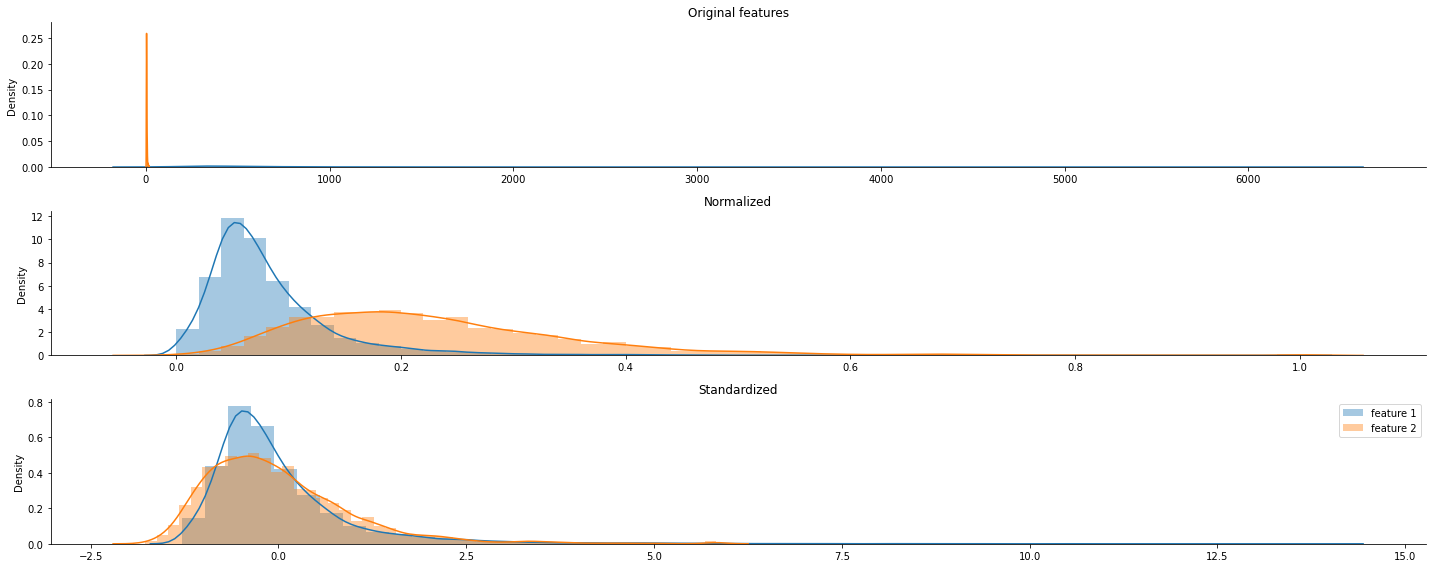

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download the data for the example, might take a minute
df3 = pd.read_csv('https://raw.githubusercontent.com/spiderPan/Google-Machine-Learning-Crash-Course/master/data/california_housing_train.csv', sep=',')

# Isolate two features that have very different ranges
x_array1 = df3['total_bedrooms'].values  # range: [1, 6445]
x_array2 = df3['median_income'].values   # range: [0.5, 15]

del df3  # DataFrame is no longer required

# Normalize the two features
x_norm1 = (x_array1 - x_array1.min()) / (x_array1.max() - x_array1.min())
x_norm2 = (x_array2 - x_array2.min()) / (x_array2.max() - x_array2.min())

# Standardize the two features
x_std1 = (x_array1 - x_array1.mean()) / x_array1.std()
x_std2 = (x_array2 - x_array2.mean()) / x_array2.std()

# Plot the distributions
plt.figure(figsize=(20, 8))

ax = plt.subplot(311)
sns.distplot(x_array1,)
sns.distplot(x_array2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Original features')

ax = plt.subplot(312)
sns.distplot(x_norm1)
sns.distplot(x_norm2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Normalized')

ax = plt.subplot(313)
sns.distplot(x_std1, label='feature 1')
sns.distplot(x_std2, label='feature 2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Standardized')
ax.legend()

plt.tight_layout()

The difference becomes apparent when looking at the distributions above: `feature 1` had a much larger range of values than `feature 2`, which would cause problems to many classifiers.

By **normalizing** them, we brought them to exactly the same range of values. Because `feature 1` had some outliers, the procedure "condensed" the *bulk* of its samples to a very short range (i.e. between $[0, 0.2)$), which caused it to be rather leptokurtic. If this effect is undesirable, we can try removing the outliers beforehand.

**Standardizing**, on the other hand, doesn't apply a *strict* limitation on the feature's range. Instead, it attempts to bring the distributions to share the same characteristics ($μ=0$ and $σ=1$). The fact that the outliers remain at high values, has caused the bulk of the samples to occupy a broad enough range (i.e. between $[-2, +2]$).

Let's see how we add a scaler in scikit-learn. Note that we should fit the scaler **only** on the training set (in order to calculate the mean and standard deviation of this set) and then transform **both** sets with this scaler.


```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # define scaler
scaler.fit(train)  # fit scaler ONLY on the training data

# transform on both sets:
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)
```

Preprocessing functions also have a `.fit_transform()` methods which we could have used like this:

```python
train_scaled = scaler.fit_transform(train)  # we should still fit the scaler ONLY on the training data
test_scaled = scaler.transform(test)
```

Another option is scikit-learn's [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) which helps in dealing with outliers.